<a href="https://colab.research.google.com/github/pranavbharathi/smartknower-major-project/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Analysis and Forecasting

## Importing data from the web
#### The first task is to retrieve some data from the Internet. Python has many built-in libraries that were developed over the years to do exactly that (e.g. urllib, urllib2, urllib3, requests).<br>
#### We will get the data from `ourworldindata.org` as the data is regularly updated here.

In [ ]:
import requests

In [ ]:
req = requests.get('https://ourworldindata.org/coronavirus-source-data')

We can use `dir` to list all the properties of an object.

In [ ]:
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

The next step is to assign the value of the `text` property of this `Request` object to a variable.

In [ ]:
page = req.text
page

'<!doctype html><html><head><meta name="viewport" content="width=device-width, initial-scale=1"/><title>Coronavirus Source Data - Our World in Data</title><meta name="description" content="Our complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes data on confirmed cases, deaths, and testing."/><link rel="canonical" href="https://ourworldindata.org/coronavirus-source-data"/><link rel="alternate" type="application/atom+xml" href="/atom.xml"/><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"/><meta property="fb:app_id" content="1149943818390250"/><meta property="og:url" content="https://ourworldindata.org/coronavirus-source-data"/><meta property="og:title" content="Coronavirus Source Data"/><meta property="og:description" content="Our complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes data on confirmed cases, death

### Importing BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

#### Create a Soup variable to store the parsed contents of the page

In [ ]:
soup = BeautifulSoup(page, 'html.parser')

In [ ]:
soup.title.get_text

<bound method Tag.get_text of <title>Coronavirus Source Data - Our World in Data</title>>

In [ ]:
soup.find_all('a')

[<a href="/">Our World<br/> in Data</a>,
 <a class="topics-button" href="/#entries"><div class="label">Articles <br/><strong>by topic</strong></div><div class="icon"><svg height="6" width="12"><path d="M0,0 L12,0 L6,6 Z" fill="currentColor"></path></svg></div></a>,
 <a data-track-note="header-navigation" href="/blog">Latest</a>,
 <a data-track-note="header-navigation" href="/about">About</a>,
 <a data-track-note="header-navigation" href="/donate">Donate</a>,
 <a data-track-note="header-navigation" href="/charts">All charts</a>,
 <a data-track-note="header-navigation" href="https://sdg-tracker.org">Sustainable Development Goals Tracker</a>,
 <a class="oxford-logo" href="https://www.oxfordmartin.ox.ac.uk/global-development"><img alt="Oxford Martin School logo" src="https://ourworldindata.org/oms-logo.svg"/></a>,
 <a class="gcdl-logo" href="https://global-change-data-lab.org/"><img alt="Global Change Data Lab logo" src="https://ourworldindata.org/gcdl-logo-narrow.png"/></a>,
 <a data-trac

In [ ]:
csv_links = []        # creating a list to store the csv links
for link in soup.find_all('a', href=True):
    if 'csv' in link['href']:
        csv_links.append(link['href'])

In [ ]:
csv_links

['https://covid.ourworldindata.org/data/owid-covid-data.csv',
 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv',
 'https://covid.ourworldindata.org/data/ecdc/total_deaths.csv',
 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv',
 'https://covid.ourworldindata.org/data/ecdc/new_deaths.csv',
 'https://covid.ourworldindata.org/data/ecdc/full_data.csv',
 'https://covid.ourworldindata.org/data/ecdc/locations.csv',
 'https://covid.ourworldindata.org/data/ecdc/full_data.csv']

#### We need the first link, that contains all the data (total cases, total deaths, new cases etc)

In [ ]:
covid_csv_link = csv_links[0]
covid_csv_link

'https://covid.ourworldindata.org/data/owid-covid-data.csv'

### Importing pandas to read the csv from url

In [ ]:
import pandas as pd
df = pd.read_csv(covid_csv_link)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46268,NaN,NaN,International,2020-09-22,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46269,NaN,NaN,International,2020-09-23,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46270,NaN,NaN,International,2020-09-24,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46271,NaN,NaN,International,2020-09-25,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46273 entries, 0 to 46272
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         46002 non-null  object 
 1   continent                        45731 non-null  object 
 2   location                         46273 non-null  object 
 3   date                             46273 non-null  object 
 4   total_cases                      45659 non-null  float64
 5   new_cases                        45452 non-null  float64
 6   new_cases_smoothed               44670 non-null  float64
 7   total_deaths                     45659 non-null  float64
 8   new_deaths                       45452 non-null  float64
 9   new_deaths_smoothed              44670 non-null  float64
 10  total_cases_per_million          45388 non-null  float64
 11  new_cases_per_million            45388 non-null  float64
 12  new_cases_smoothed

In [ ]:
# number of countries and their list
print(df['location'].nunique())
print(df['location'].unique())

212
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guate

In [ ]:
df['location'].value_counts()

Ecuador               271
Denmark               271
Japan                 271
Romania               271
Dominican Republic    271
                     ... 
Western Sahara        154
Tajikistan            149
Comoros               148
Lesotho               135
Hong Kong              23
Name: location, Length: 212, dtype: int64

### Checking the worst affected countries<br>
### We will check both `total deaths` and `total deaths per million`. The latter gives a better idea, keeping the population of country in account.

### Storing  `total deaths` and `total deaths per million` in dictionaries.

In [ ]:
countries = df['location'].values

In [ ]:
country_wise_total_deaths = {}
country_wise_deaths_per_million = {}
for country in countries:
    data_temp = df[df['location'] == country]
    country_wise_total_deaths[country] = data_temp['total_deaths'].max()
    country_wise_deaths_per_million[country] = data_temp['total_deaths_per_million'].max()

In [ ]:
# removing world from the dictionaries
country_wise_total_deaths.pop('World', None)
country_wise_deaths_per_million.pop('World', None)

126.973

In [ ]:
# taking top 25 countries based on death
from collections import Counter
k1 = Counter(country_wise_total_deaths)
cwtd_25 = k1.most_common(25)

k2 = Counter(country_wise_deaths_per_million)
cwdpm_25 = k2.most_common(25)

## Importing plotting libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# using jupyter themes for dark mode plot
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', ticks=True, grid=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


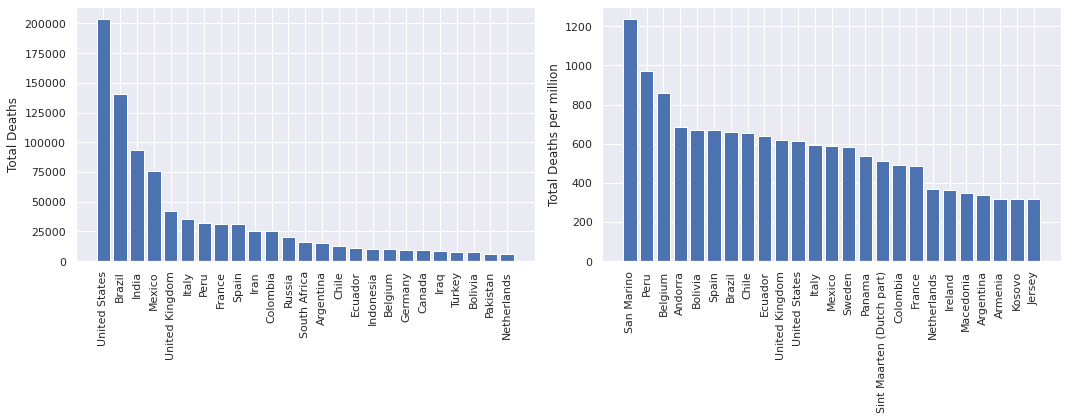

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].bar(*zip(*cwtd_25))
axes[0].tick_params(axis='x',labelrotation=90)
axes[0].set_ylabel('Total Deaths')

axes[1].bar(*zip(*cwdpm_25))
axes[1].tick_params(axis='x',labelrotation=90)
axes[1].set_ylabel('Total Deaths per million')

plt.tight_layout()

## This dataframe contains Covid data for all the countries in ascending order based on location i.e., from `Afghanistan` to `Zimbabwe`.
## After that total `World` data is also given.<br>
### We can focus on the world data or on a single country.<br>
### Choosing a country that has gone through both rise and fall in covid cases during the pandemic will give us better insights. Countries like Italy, Spain etc that have gone through phase-3 of this pandemic are more likely to give better understanding of this situation.<br>

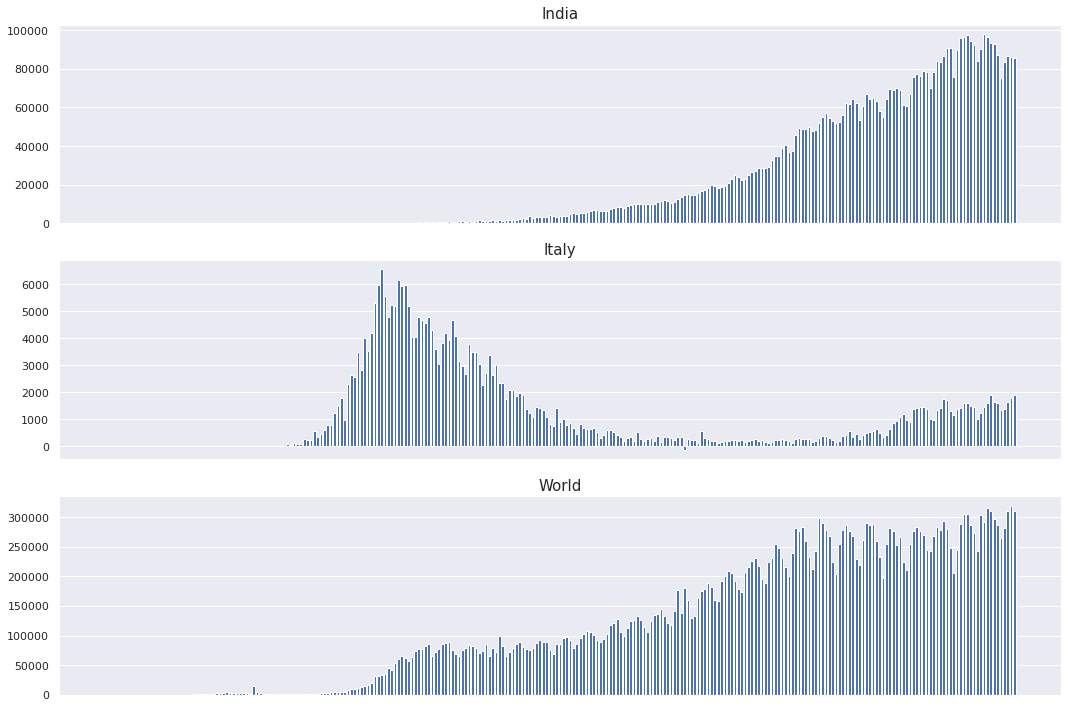

In [ ]:
# plotting daily new cases for India, Italy and World
lst = ['India', 'Italy', 'World']
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex= True)
i = 0
for country in lst:
    temp_data = df[df['location']==country]
#     sns.barplot(x = temp_data['date'], y = temp_data['new_cases'], ax = axes[i])
    axes[i].bar(range(temp_data.shape[0]), temp_data['new_cases'])
    axes[i].set_title(country, size=15)
    axes[i].set_xticks([])
    i+=1
plt.tight_layout()

### We will focus on `Italy` in this study as it has seen an increase and decrease in new cases and now the cases are again increasing.

In [ ]:
data = df[df['location'] == 'Italy'].reset_index()
data.drop('index', axis=1, inplace=True)

In [ ]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ITA,Europe,Italy,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
1,ITA,Europe,Italy,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
2,ITA,Europe,Italy,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
3,ITA,Europe,Italy,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
4,ITA,Europe,Italy,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         271 non-null    object 
 1   continent                        271 non-null    object 
 2   location                         271 non-null    object 
 3   date                             271 non-null    object 
 4   total_cases                      271 non-null    float64
 5   new_cases                        271 non-null    float64
 6   new_cases_smoothed               265 non-null    float64
 7   total_deaths                     271 non-null    float64
 8   new_deaths                       271 non-null    float64
 9   new_deaths_smoothed              265 non-null    float64
 10  total_cases_per_million          271 non-null    float64
 11  new_cases_per_million            271 non-null    float64
 12  new_cases_smoothed_per

### As the dataset is too small and there are too many features, this can cause underfitting of the model. Many of these features are derived from other columns (like total cases, new cases, deaths etc). We will take only the important non null columns for analysis.

In [ ]:
data_non_null = data.dropna(axis=1, how='any')
data_non_null

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ITA,Europe,Italy,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
1,ITA,Europe,Italy,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
2,ITA,Europe,Italy,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
3,ITA,Europe,Italy,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
4,ITA,Europe,Italy,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,ITA,Europe,Italy,2020-09-22,299506.0,1350.0,35724.0,17.0,4953.638,22.328,590.852,0.281,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
267,ITA,Europe,Italy,2020-09-23,300897.0,1391.0,35738.0,14.0,4976.644,23.006,591.084,0.232,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
268,ITA,Europe,Italy,2020-09-24,302537.0,1640.0,35758.0,20.0,5003.769,27.125,591.414,0.331,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88
269,ITA,Europe,Italy,2020-09-25,304323.0,1786.0,35781.0,23.0,5033.308,29.539,591.795,0.380,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,3.18,83.51,0.88


### The columns of utmost importance like `total_cases`, `new_cases`, `total_deaths`, `new_deaths`, `total_cases_per_million` are still there.

In [ ]:
data_non_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    271 non-null    object 
 1   continent                   271 non-null    object 
 2   location                    271 non-null    object 
 3   date                        271 non-null    object 
 4   total_cases                 271 non-null    float64
 5   new_cases                   271 non-null    float64
 6   total_deaths                271 non-null    float64
 7   new_deaths                  271 non-null    float64
 8   total_cases_per_million     271 non-null    float64
 9   new_cases_per_million       271 non-null    float64
 10  total_deaths_per_million    271 non-null    float64
 11  new_deaths_per_million      271 non-null    float64
 12  population                  271 non-null    float64
 13  population_density          271 non

In [ ]:
# checking unique values in each column
for col in data_non_null.columns:
    print(col, data_non_null[col].nunique())

iso_code 1
continent 1
location 1
date 271
total_cases 220
new_cases 211
total_deaths 217
new_deaths 130
total_cases_per_million 220
new_cases_per_million 211
total_deaths_per_million 217
new_deaths_per_million 130
population 1
population_density 1
median_age 1
aged_65_older 1
aged_70_older 1
gdp_per_capita 1
extreme_poverty 1
cardiovasc_death_rate 1
diabetes_prevalence 1
female_smokers 1
male_smokers 1
hospital_beds_per_thousand 1
life_expectancy 1
human_development_index 1


We can see that there are columns that have only one unique value per column. These are the column that repreent something that is unique to a particular country (in this case `Italy`) such as `gdp_per_capita`, `human_development_index`.<br>
These columns will be useful when we have to compare two countries or a coutry wrt world data.
These columns will not contribute to our forcast, so we will drop these columns.

In [ ]:
unique_val_cols = []
for col in data_non_null.columns:
    if data_non_null[col].nunique() == 1:
        unique_val_cols.append(col)

In [ ]:
unique_val_cols

['iso_code',
 'continent',
 'location',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [ ]:
data_italy = data_non_null.drop(unique_val_cols, axis = 1)

In [ ]:
data_italy

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
1,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
2,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
3,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
4,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
266,2020-09-22,299506.0,1350.0,35724.0,17.0,4953.638,22.328,590.852,0.281
267,2020-09-23,300897.0,1391.0,35738.0,14.0,4976.644,23.006,591.084,0.232
268,2020-09-24,302537.0,1640.0,35758.0,20.0,5003.769,27.125,591.414,0.331
269,2020-09-25,304323.0,1786.0,35781.0,23.0,5033.308,29.539,591.795,0.380


## Creating Checkpoint

In [ ]:
data_final = data_italy

In [ ]:
data_final.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      271 non-null    object 
 1   total_cases               271 non-null    float64
 2   new_cases                 271 non-null    float64
 3   total_deaths              271 non-null    float64
 4   new_deaths                271 non-null    float64
 5   total_cases_per_million   271 non-null    float64
 6   new_cases_per_million     271 non-null    float64
 7   total_deaths_per_million  271 non-null    float64
 8   new_deaths_per_million    271 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.2+ KB


In [ ]:
# saving dates in a variable before converting date column to datetime dtype
# ploting will be easier with this
dates = data_final['date'].tolist()
data_final['date'] = pd.to_datetime(data_final['date'], format='%Y-%m-%d')
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      271 non-null    datetime64[ns]
 1   total_cases               271 non-null    float64       
 2   new_cases                 271 non-null    float64       
 3   total_deaths              271 non-null    float64       
 4   new_deaths                271 non-null    float64       
 5   total_cases_per_million   271 non-null    float64       
 6   new_cases_per_million     271 non-null    float64       
 7   total_deaths_per_million  271 non-null    float64       
 8   new_deaths_per_million    271 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 19.2 KB


In [ ]:
data_final.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,158096.014760,1130.018450,21527.638376,132.107011,2614.807103,18.689779,356.053384,2.184952
std,110831.177228,1492.733025,15404.185359,220.229576,1833.076804,24.688863,254.775391,3.642467
min,0.000000,-148.000000,0.000000,-31.000000,0.000000,-2.448000,0.000000,-0.513000
25%,5259.500000,162.500000,215.000000,4.000000,86.988500,2.687500,3.556000,0.066000
50%,222104.000000,412.000000,31106.000000,14.000000,3673.458000,6.814000,514.473000,0.232000
75%,244529.000000,1458.000000,35051.500000,161.500000,4044.353500,24.114000,579.729500,2.671000
max,306235.000000,6557.000000,35801.000000,971.000000,5064.931000,108.449000,592.126000,16.060000


## Visualizing the data to get the relation between the features

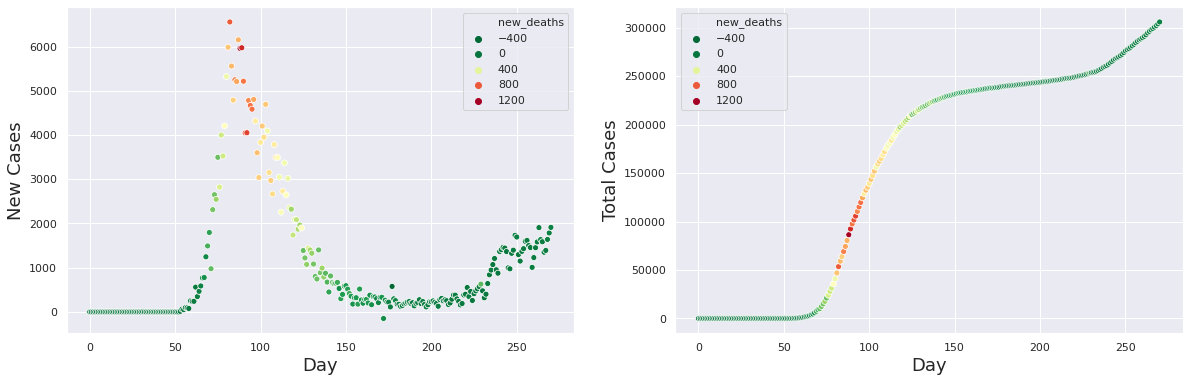

In [ ]:
# plotting daily cases each day with hue of new deaths each day
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.scatterplot(x=range(data_final.shape[0]), y='new_cases', hue='new_deaths', data=data_final, palette='RdYlGn_r', ax=axes[0])
sns.scatterplot(x=range(data_final.shape[0]), y='total_cases', hue='new_deaths', data=data_final, palette='RdYlGn_r', ax=axes[1])
axes[0].set_xlabel('Day', size=18)
axes[0].set_ylabel('New Cases', size=18)
axes[1].set_xlabel('Day', size=18)
axes[1].set_ylabel('Total Cases', size=18)
plt.show()

We can see that after day 50, the number of new cases increased tremendously, therfore the total cases curve is very steep.<br>
As obvious, number of people dying per day also incresed with increasing new cases.<br>
(The red color shows high deaths per day while green shows low deaths per day).<br><br>
Then the new cases again starts to decrease after day 90, but its still high. New deaths each day also starts to decrease.<br><br>
After day 150, we can see a stable condition where new cases and new deaths are very low.<br><br>
But after day 220, there is a sudden increase in cases again, but the deaths per day seems to be controlled this time.

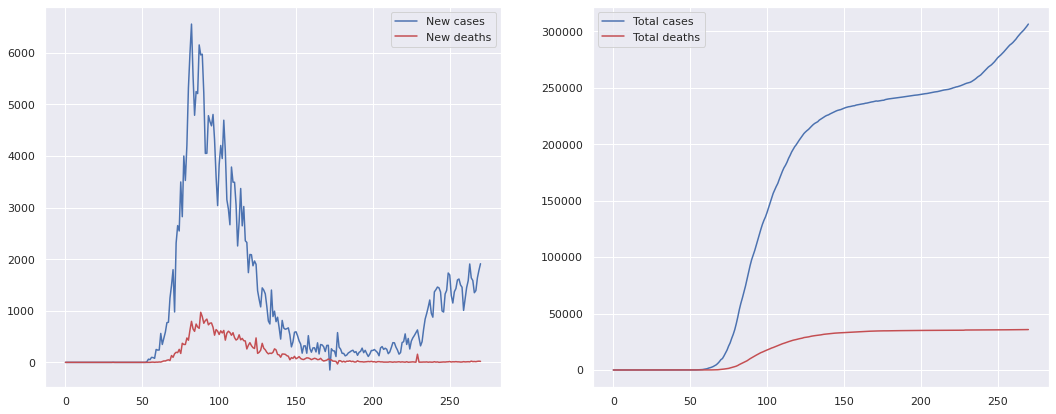

In [ ]:
# plotting new deaths and new cases
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
axes[0].plot(data_final['new_cases'], label='New cases')
axes[0].plot(data_final['new_deaths'], label='New deaths', color='r')
axes[0].legend()

axes[1].plot(data_final['total_cases'], label='Total cases')
axes[1].plot(data_final['total_deaths'], label='Total deaths', color='r')
axes[1].legend()
plt.show()

It is clear from the first graph that even though the new cases are increasing again (after day 200), the deaths are still very low.<br><br>
In the second graph we can see that tha total number of cases are again increasing rapidly (after day 200) but the total deaths curve is flattened now indicating decrease in death rate due to covid-19.

# Time series forecasting
## Importing FbProphet

In [ ]:
from fbprophet import Prophet

#### Creating a dataframe for new cases.

In [ ]:
new_cases_df = data_final[['date','new_cases']]
new_cases_df.columns = ['ds', 'y']

In [ ]:
new_cases_df.head()

,ds,y
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


In [ ]:
m = Prophet()
m.fit(new_cases_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(60,'D')
future.tail()

,ds
326,2020-11-21
327,2020-11-22
328,2020-11-23
329,2020-11-24
330,2020-11-25


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
326,2020-11-21,1872.292784,473.442097,3181.450827
327,2020-11-22,1904.887126,611.615427,3179.635076
328,2020-11-23,1769.400893,371.250699,3119.685194
329,2020-11-24,1621.566969,253.331377,3050.346951
330,2020-11-25,1645.419080,280.647072,3059.136803


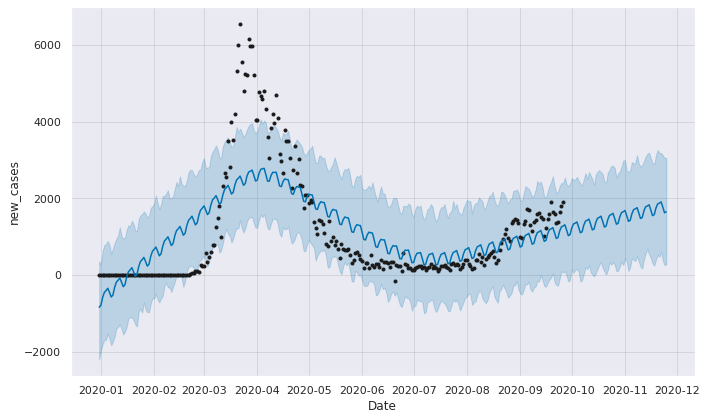

In [ ]:
fig1 = m.plot(forecast,xlabel='Date',ylabel='new_cases')

#### Creating a dataframe for new deaths

In [ ]:
new_deaths_df = data_final[['date','new_deaths']]
new_deaths_df.columns = ['ds', 'y']

In [ ]:
new_deaths_df.tail()

,ds,y
266,2020-09-22,17.0
267,2020-09-23,14.0
268,2020-09-24,20.0
269,2020-09-25,23.0
270,2020-09-26,20.0


In [ ]:
m2 = Prophet()
m2.fit(new_deaths_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(90,'H')
future.tail()

,ds
356,2020-09-29 14:00:00
357,2020-09-29 15:00:00
358,2020-09-29 16:00:00
359,2020-09-29 17:00:00
360,2020-09-29 18:00:00


In [ ]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
356,2020-09-29 14:00:00,-56.652515,-234.278040,114.718572
357,2020-09-29 15:00:00,-56.327071,-234.027164,117.879419
358,2020-09-29 16:00:00,-56.064908,-219.784948,119.683857
359,2020-09-29 17:00:00,-55.864016,-235.002384,112.209413
360,2020-09-29 18:00:00,-55.721854,-230.440417,112.551352


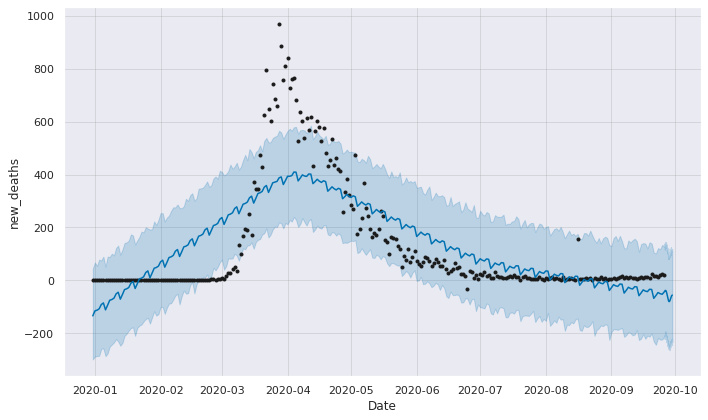

In [ ]:
fig1 = m2.plot(forecast2,xlabel='Date',ylabel='new_deaths')